In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

<AxesSubplot: >

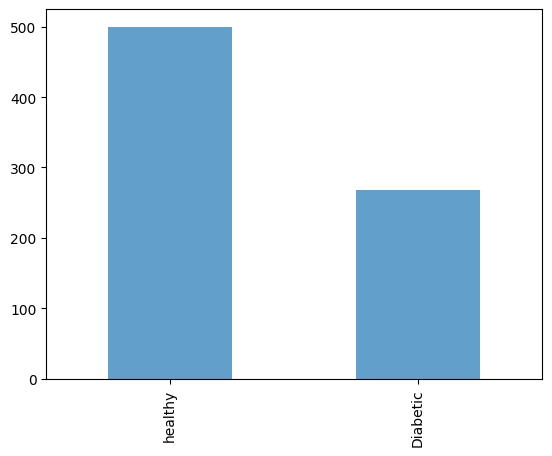

In [4]:
Healthy =  df[ df['Outcome'] == 0 ]
Diabetic = df[ df['Outcome'] == 1 ]

h_diab = pd.Series({'healthy':Healthy.shape[0],
            'Diabetic':Diabetic.shape[0]})
h_diab.plot.bar(alpha=0.7)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

rmse  = lambda labels, predictions: np.sqrt(mean_squared_error(labels, predictions))

lg_model = LogisticRegression(max_iter=1000,C=0.01).fit(X_train, y_train)
lg_predictions = lg_model.predict(X_test)
print('False negative :')
rmse(y_test, lg_predictions)
# Since the consequences of detection False Negatives are high; the task should be Recall centric.

False negative :


0.5020284058947294

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

print('Accuracy is as follows',accuracy_score(y_test, lg_predictions))
print('P(score(x+)>score(x−)) :',roc_auc_score(y_test, lg_predictions))

Accuracy is as follows 0.7479674796747967
P(score(x+)>score(x−)) : 0.716931216931217


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lg_predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       405
           1       0.63      0.62      0.63       210

    accuracy                           0.75       615
   macro avg       0.72      0.72      0.72       615
weighted avg       0.75      0.75      0.75       615

